In [1]:
import parselmouth
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
monofile = '../resources/two_plus_two_22.wav'   # Mono recording
stereofile = '../resources/two_plus_two_22.stereo.wav'  # Stereo recording (channels identical)
stereorevfile = '../resources/two_plus_two_22.stereo.rev.wav'  # Stereo recording (one channel reverse of other)

# Exploration of libROSA and Parselmouth

This notebook explores the [libROSA](https://librosa.github.io/librosa/index.html#) and [Parselmouth](https://github.com/YannickJadoul/Parselmouth) Python libraries and illustrates how to perform basic operations in each.

In short, libROSA is a music and audio library. It loads audio as numpy arrays and provides a number of analysis functions that operate on array inputs.

Parselmouth is a Python interface that makes Praat C/C++ internals accessible to Python code. Praat objects are created as Python objects, and Praat functions are accessed as methods called on the objects.

It is possible to mix library usage. The sampled data in a Parselmouth Sound object can be accessed as a numpy array, which allows it to be used with libROSA and many other Python libraries. Data can flow in the opposite direction--a Sound object can be created by passing a numpy array of audio data and the sample rate to `parselmouth.Sound()`.

# libROSA load()

Load an audio file in libROSA with [load()](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load), which returns a numpy ndarray of data and the sample rate in a tuple. **`load()` automatically resamples the audio file to the value of the `sr` input parameter (default 22050).** Set `sr` to `None` to avoid resampling.

In [3]:
rsnd, sr = librosa.load(monofile)               # default resample rate
print(sr, type(rsnd), rsnd.shape, rsnd)
rsnd, sr = librosa.load(monofile, sr=11025)     # explicit resample rate
print(sr, type(rsnd), rsnd.shape, rsnd)
rsnd, sr = librosa.load(monofile, sr=None)      # no resampling
print(sr, type(rsnd), rsnd.shape, rsnd)

22050 <class 'numpy.ndarray'> (48510,) [ 0.00080034  0.00059939  0.00022201 ... -0.00144185 -0.00148943
 -0.00082987]
11025 <class 'numpy.ndarray'> (24255,) [ 0.00072749  0.00029601  0.00050131 ... -0.001079   -0.00106304
 -0.00142548]
12000 <class 'numpy.ndarray'> (26400,) [ 0.00082397  0.00024414  0.00048828 ... -0.00100708 -0.00109863
 -0.00146484]


**`load()` converts to mono by default** (apparently by averaging channels). Set the `mono` parameter to `False` to keep the channels separate.

In [4]:
stereo, stereo_sr = librosa.load(stereofile, sr=None)
print(stereo_sr, type(stereo), stereo.shape, stereo)
stereo, stereo_sr = librosa.load(stereofile, mono=False, sr=None)
print(stereo_sr, type(stereo), stereo.shape, stereo)

12000 <class 'numpy.ndarray'> (26400,) [ 0.00082397  0.00024414  0.00048828 ... -0.00100708 -0.00109863
 -0.00146484]
12000 <class 'numpy.ndarray'> (2, 26400) [[ 0.00082397  0.00024414  0.00048828 ... -0.00100708 -0.00109863
  -0.00146484]
 [ 0.00082397  0.00024414  0.00048828 ... -0.00100708 -0.00109863
  -0.00146484]]


Notice that libROSA returns mono data as a 1D numpy array, and stereo data is a 2D array with the channels stored as rows.

In [5]:
print(rsnd.shape)
print(stereo.shape)

(26400,)
(2, 26400)


**Load a portion of the audio**

Use `offset` and `duration` to load only a specific portion of the audio file. This can be used to reduce memory usage when accessing long audio files; load only what you need.

In [6]:
short, short_sr = librosa.load(monofile, sr=None, offset=0.5, duration=1.0)
librosa.get_duration(short, sr=short_sr)

1.0

## Plotting a waveform

The [waveplot()](https://librosa.github.io/librosa/generated/librosa.display.waveplot.html#librosa.display.waveplot) function creates a matplotlib plot of the waveform.

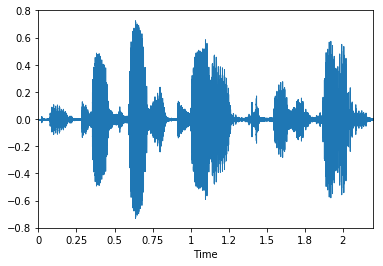

In [7]:
librosa.display.waveplot(rsnd, sr)

## Parselmouth Sound

An audio file can be loaded in Parselmouth by passing the filename to `Sound()` on initialization.

In [8]:
psnd = parselmouth.Sound(monofile)
print('{:}\n{:}'.format(type(psnd), psnd))

<class 'parselmouth.Sound'>
Object type: Sound
Object name: <no name>
Date: Mon Feb  4 18:42:11 2019

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.2 seconds
   Total duration: 2.2 seconds
Time sampling:
   Number of samples: 26400
   Sampling period: 8.333333333333333e-05 seconds
   Sampling frequency: 12000 Hz
   First sample centred at: 4.1666666666666665e-05 seconds
Amplitude:
   Minimum: -0.727813721 Pascal
   Maximum: 0.719146729 Pascal
   Mean: -0.000320011486 Pascal
   Root-mean-square: 0.123063992 Pascal
Total energy: 0.0333184416 Pascal² sec (energy in air: 8.32961039e-05 Joule/m²)
Mean power (intensity) in air: 3.78618654e-05 Watt/m² = 75.78 dB
Standard deviation in channel 1: 0.123065907 Pascal



A Sound object can access any of the Praat algorithms that operate on Sounds, and usually the method name is easily mapped to the algorithm name found in Praat's Sound menu. For example, the 'To Pitch...' algorithm is accessed as the method name `to_pitch()`.

In [9]:
psnd.to_pitch()

A list of methods available for Sound objects is displayed in the next cell.

In [10]:
print('\n'.join([name for name in dir(psnd) if not name.startswith('_')]))

FileFormat
ToHarmonicityMethod
ToPitchMethod
add
as_array
at_xy
autocorrelate
centre_time
class_name
combine_to_stereo
concatenate
convert_to_mono
convert_to_stereo
convolve
copy
cross_correlate
de_emphasize
deepen_band_modulation
divide
dt
duration
dx
dy
end_time
extract_all_channels
extract_channel
extract_left_channel
extract_part
extract_part_for_overlap
extract_right_channel
formula
frame_number_to_time
full_name
get_column_distance
get_end_time
get_energy
get_energy_in_air
get_frame_number_from_time
get_highest_x
get_highest_y
get_index_from_time
get_intensity
get_lowest_x
get_lowest_y
get_maximum
get_minimum
get_nearest_zero_crossing
get_number_of_channels
get_number_of_columns
get_number_of_frames
get_number_of_rows
get_number_of_samples
get_power
get_power_in_air
get_rms
get_root_mean_square
get_row_distance
get_sampling_frequency
get_sampling_period
get_start_time
get_sum
get_time_from_frame_number
get_time_from_index
get_time_step
get_total_duration
get_value
get_value_at_xy

The data values of a Sound can be accessed as a numpy array via the `values` attribute or the `as_array()` method.

(It is not clear to me whether the underlying datatype of a Parselmouth Sound is a numpy array. I think values/as_array() are interfaces to the underlying Praat array instead, which might mean there is some overhead associated with accessing the data as numpy arrays. If there is, let's hope it's negligible.)

In [11]:
print(type(psnd.values), psnd.values[:5])
print(type(psnd.as_array()), psnd.as_array()[:5])

<class 'numpy.ndarray'> [[ 0.00082397  0.00024414  0.00048828 ... -0.00100708 -0.00109863
  -0.00146484]]
<class 'numpy.ndarray'> [[ 0.00082397  0.00024414  0.00048828 ... -0.00100708 -0.00109863
  -0.00146484]]


Viewing Sound data as a numpy array has an important difference when compared to the numpy array returned by libROSA's `load()`--the Sound data is always 2D, even for mono audio. Compare:

In [12]:
print(rsnd.shape)   # mono audio from libROSA's load()
print(psnd.values.shape)  # mono audio from Parselmouth's Sound
print(stereo.shape)  # stereo audio from libROSA's load()
print(parselmouth.Sound(stereofile).values.shape) # stereo audio from Parselmouth's Sound

(26400,)
(1, 26400)
(2, 26400)
(2, 26400)


Some Sound methods have numpy (near-) equivalents.

In [13]:
print('Sound max ', psnd.get_maximum())   # Praat
print('numpy max ', psnd.values.max())    # numpy
print('Sound min ', psnd.get_minimum())   # Praat
print('numpy min ', psnd.values.min())    # numpy

Sound max  0.719146728515625
numpy max  0.719146728515625
Sound min  -0.727813720703125
numpy min  -0.727813720703125


Note, however, that Praat's 'Get maximum' help page describes a number of interpolation strategies that alter precision of the returned value. The numpy `max()` method returns the maximum value with no interpolation. It appears that the Parselmouth `get_maximum()` defaults to Praat's Interpolation=None setting, which is not the default setting when calling 'Get maximum' in Praat itself.

## Plotting a waveform

Parselmouth does not include Praat's GUI elements and does not do plotting. You can access the data in a Sound object and plot it with matplotlib.

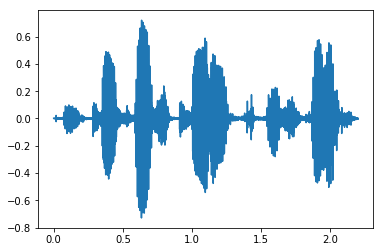

In [14]:
plt.plot(psnd.xs(), psnd.values.T)

In the plot above, the `xs()` method retrieves the sample times as an array from the Sound object for use as the X axis. This array is a 1D numpy array.

In [15]:
print(type(psnd.xs()))
print(psnd.xs().shape)

<class 'numpy.ndarray'>
(26400,)


The Y values are the sample values retrieved by the `values` attribute. Since `values` returns a 2D array with the channels in the first dimension, it is necessary to transpose them so that the first dimension contains the sample data. This tranposition makes the shapes of the X and Y axes compatible. An alternative to transposing is to [`squeeze()`](https://docs.scipy.org/doc/numpy-1.9.0/reference/generated/numpy.squeeze.html) the singular dimension out of the 2D array.

In [16]:
print(psnd.values.shape)   # channels, samples; not compatible with xs()
print(psnd.values.T.shape) # transposed samples, channels; compatible with xs()
print(psnd.values.squeeze().shape)  # alternative to transposing

(1, 26400)
(26400, 1)
(26400,)


# Mixing libraries

The examples in this section show how to mix libROSA and Parselmouth. In reality, any numpy data (like that loaded with [scipy.io.wavfile.read](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html)) can also be mixed with either library.

## Create a Sound object with data loaded by libROSA

Audio data loaded with `load()` can be used to instantiate a Parselmouth Sound object. Pass the data and sample rate in the call to `Sound()`. As noted earlier, `load()` returns a 1D array for a mono audio file whereas the mono data in a Sound object is in a 2D array. 

In [17]:
data, rate = librosa.load(monofile, sr=None, offset=0.5, duration=1.0)
fromrosa = parselmouth.Sound(data, rate)
print(data.shape)
print(fromrosa.values.shape)

(12000,)
(1, 12000)


The Sound object created from a numpy array has the same methods available to it as if it had been loaded directly from a file.

In [18]:
fromrosa.to_pitch()

## Retrieve a numpy array from data loaded by Parselmouth

We have already seen multiple examples of accessing `Sound` data as a numpy array. Use `values` or `as_array()` to access the data. If you want to alter the data you assign to the `values` attribute. Attempting to assign to `as_array()` will fail since you can't assign to a function call. In the following cell the audio data is plotted in blue, then reduced by 50% and replotted in yellow.

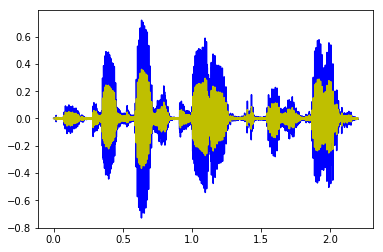

In [19]:
parsel = parselmouth.Sound(monofile)
plt.plot(parsel.xs(), parsel.values.T, color='b')
parsel.values *= 0.5
plt.plot(parsel.xs(), parsel.values.T, color='y')